In [2]:
from google.colab import files

# Upload a file
uploaded = files.upload()



Saving 5. Classify Customer Churn.csv to 5. Classify Customer Churn.csv


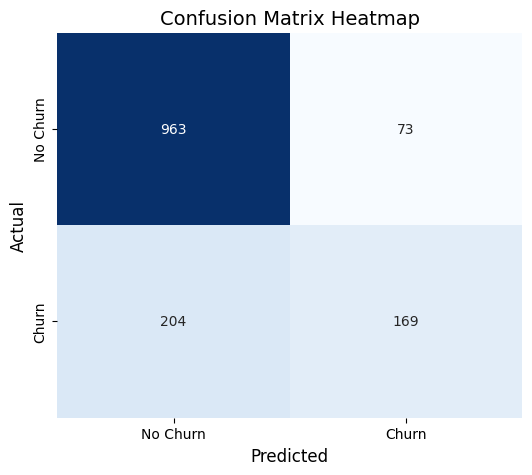


Model Evaluation Metrics:
---------------------------
Accuracy:   80.34%
Precision:  69.83%
Recall:     45.31%


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("5. Classify Customer Churn.csv")

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)

# Create a more readable heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], cbar=False)
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Evaluation metrics with formatting
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Create a formatted output for metrics
print("\nModel Evaluation Metrics:")
print("---------------------------")
print(f"Accuracy:   {accuracy * 100:.2f}%")
print(f"Precision:  {precision * 100:.2f}%")
print(f"Recall:     {recall * 100:.2f}%")

